<a href="https://colab.research.google.com/github/siglimumuni/Published-Articles/blob/main/Bike_Share_Toronto_An_Exploration_of_Trip_Patterns_and_User_Behaviour_with%C2%A0Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Share Toronto: An Exploration of Trip Patterns and User Behaviour with Python

## Loading the Data

In [ ]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import gmaps
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

#Load the dataset
df = pd.read_csv("/Users/sig/Desktop/Bikeshare_cleaned_transformed.csv",index_col=0)

#preview the first 5 rows
df.head()

,Date,Time,Trip ID,Trip Duration,Start Station ID,Start Time,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,...,Day of Week,Hour,Month,Year,Quarter,Route ID,Distance (km),Weekend,Holiday,Season
0,2018-01-01,00:47:00,2383648,393.0,7018,2018-01-01 00:47:00,Bremner Blvd / Rees St,43.641529,-79.386741,7176,...,Monday,0,January,2018,1,7018-7176,1.07,No,Yes,Winter
1,2018-01-10,17:38:00,2396000,398.0,7018,2018-01-10 17:38:00,Bremner Blvd / Rees St,43.641529,-79.386741,7176,...,Wednesday,17,January,2018,1,7018-7176,1.07,No,No,Winter
2,2018-01-18,12:31:00,2410743,404.0,7018,2018-01-18 12:31:00,Bremner Blvd / Rees St,43.641529,-79.386741,7176,...,Thursday,12,January,2018,1,7018-7176,1.07,No,No,Winter
3,2018-01-31,18:21:00,2442186,431.0,7018,2018-01-31 18:21:00,Bremner Blvd / Rees St,43.641529,-79.386741,7176,...,Wednesday,18,January,2018,1,7018-7176,1.07,No,No,Winter
4,2018-02-05,17:45:00,2451198,394.0,7018,2018-02-05 17:45:00,Bremner Blvd / Rees St,43.641529,-79.386741,7176,...,Monday,17,February,2018,1,7018-7176,1.07,No,No,Winter


In [ ]:
#check dataframe structure and. attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6812970 entries, 0 to 6812969
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Date                     object 
 1   Time                     object 
 2   Trip ID                  int64  
 3   Trip Duration            float64
 4   Start Station ID         int64  
 5   Start Time               object 
 6   Start Station Name       object 
 7   Start Station Latitude   float64
 8   Start Station Longitude  float64
 9   End Station ID           int64  
 10  End Time                 object 
 11  End Station Name         object 
 12  End Station Latitude     float64
 13  End Station Longitude    float64
 14  User Type                object 
 15  Day of Week              object 
 16  Hour                     int64  
 17  Month                    object 
 18  Year                     int64  
 19  Quarter                  int64  
 20  Route ID                 object 
 21  Distance

In [ ]:
#check for missing values
df.isnull().sum()

Date                       0
Time                       0
Trip ID                    0
Trip Duration              0
Start Station ID           0
Start Time                 0
Start Station Name         0
Start Station Latitude     0
Start Station Longitude    0
End Station ID             0
End Time                   0
End Station Name           0
End Station Latitude       0
End Station Longitude      0
User Type                  0
Day of Week                0
Hour                       0
Month                      0
Year                       0
Quarter                    0
Route ID                   0
Distance (km)              0
Weekend                    0
Holiday                    0
Season                     0
dtype: int64

## Preparing the Data

In [ ]:
#Convert selected column data types into string objects
df[["Trip ID","Start Station ID","End Station ID","Hour","Year","Quarter"]]\
= df[["Trip ID","Start Station ID","End Station ID","Hour","Year","Quarter"]].astype(str)

In [ ]:
#Convert the Trip Duration column from seconds to minutes
df["Trip Duration"] = round(df["Trip Duration"] / 60,1)

#Rename the Trip Duration column to specify the unit of measurement
df = df.rename(columns={"Trip Duration":"Trip Duration (Mins)"})

#Convert the Start Time column to a datetime object
df["Start Time"] = pd.to_datetime(df["Start Time"])

In [ ]:
#Create dictionary object to map new labels to the Holiday and Weekend columns
holidaymap = {"Yes":"Holiday","No":"Non-Holiday"}
weekendmap = {"Yes":"Weekend","No":"Weekday"}

#Apply the new labels to the Holiday and Weekend columns respectively
df["Holiday"] = df["Holiday"].map(holidaymap)
df["Weekend"] = df["Weekend"].map(weekendmap)

## Growth Trends

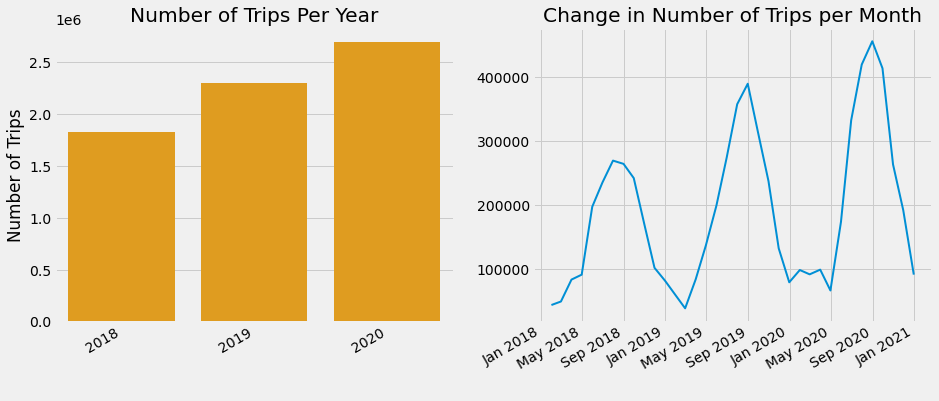

In [ ]:
#Create a subplot figure to with one row and two columns
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

#Plot a bar graph for number of rides per year
sns.countplot(ax=ax1,data=df,x='Year',color='orange')\
   .set(title="Number of Trips Per Year",ylabel="Number of Trips",xlabel=" ")


#Aggregate the dataframe by number of rides per month
rides_per_month = df.set_index("Start Time")["Trip ID"].resample('M').count()

#Plot a line graph depicting number of riders by month from 2018-2020
sns.lineplot(ax=ax2,data=rides_per_month,linewidth=2)\
         .set(title = "Change in Number of Trips per Month",ylabel = "",xlabel = " ")
ax2.xaxis.set_major_locator(md.AutoDateLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))

#format the x axis
fig.autofmt_xdate()

In [ ]:
#Aggregate dataframe to show a count of rides by each month
trips_per_year = df[["Start Time","Year"]].set_index("Start Time")["Year"]\
                                  .resample('M').count().reset_index()\
                                  .rename(columns={"Year":"Number of Trips"})

#Convert Start Time column to a datetime object
trips_per_year["Start Time"] = pd.to_datetime(trips_per_year["Start Time"])

#Add a year and month column to dataframe
trips_per_year["Year"] = trips_per_year["Start Time"].dt.year
trips_per_year["Month"] = trips_per_year["Start Time"].dt.month_name()

trips_per_year.head()

,Start Time,Number of Trips,Year,Month
0,2018-01-31,43339,2018,January
1,2018-02-28,48832,2018,February
2,2018-03-31,83070,2018,March
3,2018-04-30,90767,2018,April
4,2018-05-31,196839,2018,May


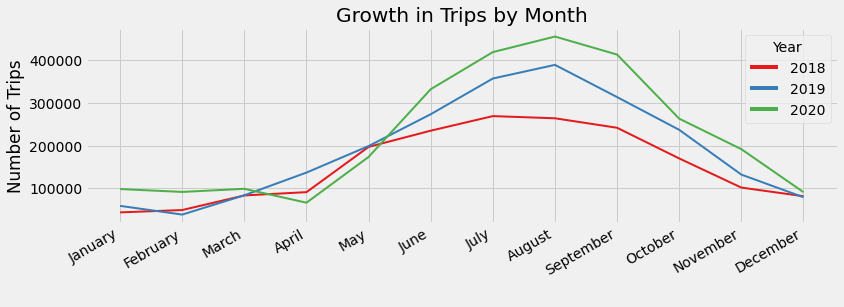

In [ ]:
#Plot a line grapth depicting growth trends per month for each year from 2018 to 2020.
fig,ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=trips_per_year,x= "Month",y="Number of Trips",hue="Year",palette="Set1",linewidth=2)\
            .set(title="Growth in Trips by Month",xlabel=" ")

#format x axis
fig.autofmt_xdate()

## Trip Duration and Distance

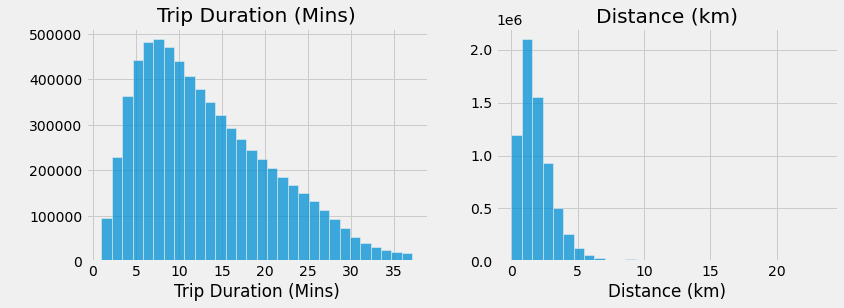

In [ ]:
#Create a subplot object with one row and two columns
fig, axes = plt.subplots(1,2,figsize=(12,4))

#Plot two histograms, Trip Duration and Distance
for i,col in enumerate(["Trip Duration (Mins)","Distance (km)"]):
    sns.histplot(df[col],ax=axes[i],bins=30).set(title=col,ylabel=" ")
    axes[i].set(title=col)

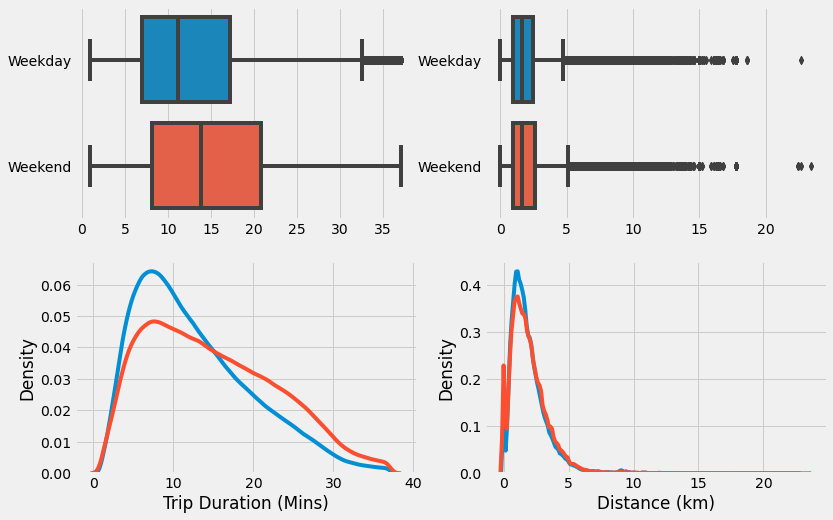

In [ ]:
#Plot box plots and density plots to depict distribution of Trip Distance and Trip Duration by weekend/weekday
fig, (ax1,ax2) = plt.subplots(2,2,figsize=(12,8))

for i, var in enumerate(['Trip Duration (Mins)','Distance (km)']):
    for j,day in enumerate(df['Weekend'].unique()):
        sns.distplot(df[df['Weekend'] == day][var],hist=False,ax=ax2[i])
        
        sns.boxplot(x=var, y="Weekend",data=df, ax=ax1[i]).set(xlabel="",ylabel="")

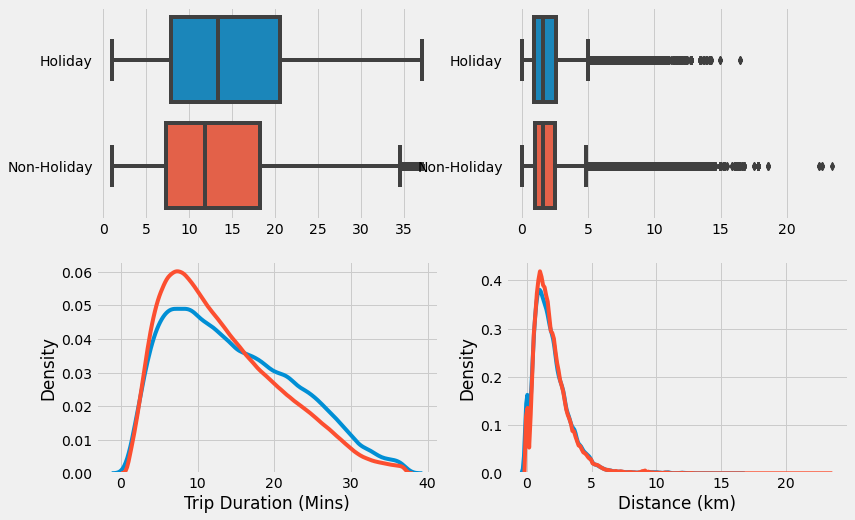

In [ ]:
#Plot box pots and density plots to depict distribution of Trip Distance and Trip Duration by holidays/non-holidays
fig, (ax1,ax2) = plt.subplots(2,2,figsize=(12,8))

for i, var in enumerate(['Trip Duration (Mins)','Distance (km)']):
    for j,day in enumerate(df['Holiday'].unique()):
        sns.distplot(df[df['Holiday'] == day][var],hist=False,ax=ax2[i])
        
        sns.boxplot(x=var, y="Holiday",data=df, ax=ax1[i]).set(xlabel="",ylabel="")

## Biking Patterns and Seasonality

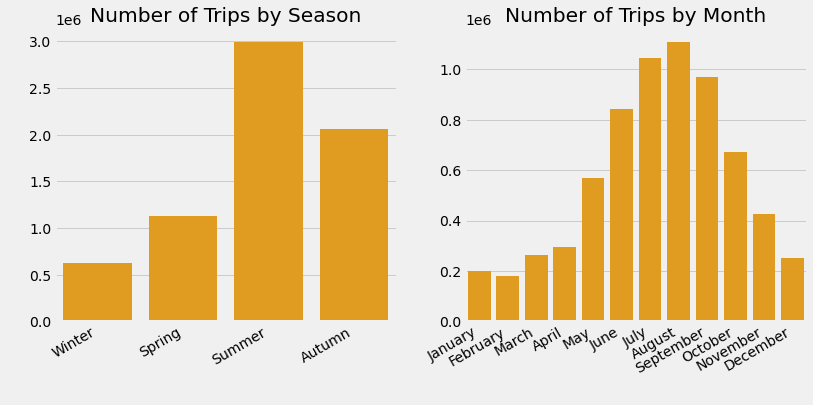

In [ ]:
#Create a subplot object with one row and two columns
fig, axes = plt.subplots(1,2,figsize=(12,6))

#Plot two bar graphs, Season and Month
for i,col in enumerate(["Season","Month"]):
    sns.countplot(df[col],ax=axes[i],color="orange").set(title="Number of Trips by "+ col,ylabel=" ",xlabel=" ")
fig.autofmt_xdate()

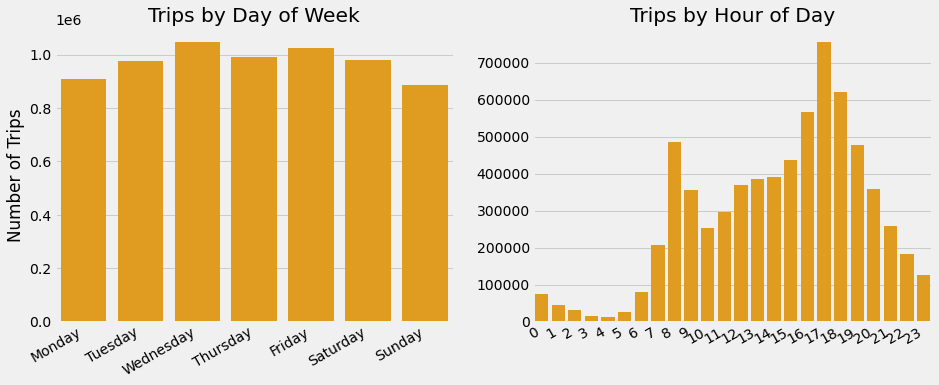

In [ ]:
#Create two bar graphs depicting number or rides by day of week and by hour of day
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

sns.countplot(df["Day of Week"],ax=ax1,color='orange',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])\
              .set(title="Trips by Day of Week",xlabel="",ylabel="Number of Trips")

sns.countplot(df["Hour"],ax=ax2,color='orange',order=[str(x) for x in range(24)])\
              .set(title="Trips by Hour of Day",xlabel="",ylabel="")

#format x axis
fig.autofmt_xdate()

Text(0.5, 1.0, 'Seasonality by Day and Hour')

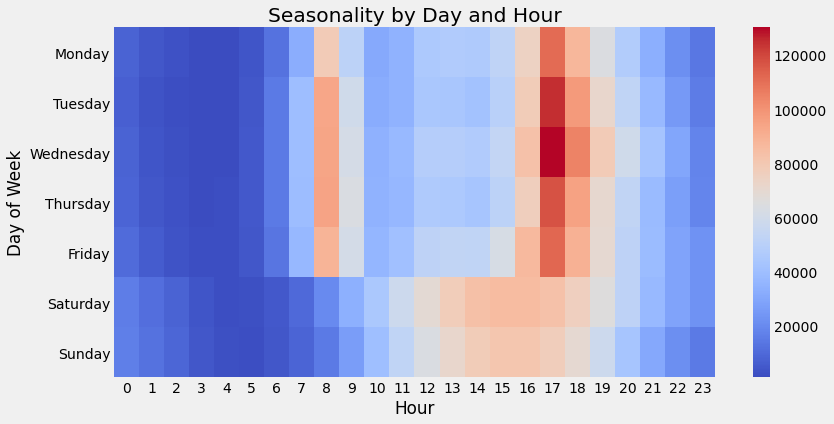

In [ ]:
#create a pivot table
pivot_table = pd.DataFrame(pd.pivot_table(df,index='Day of Week',columns='Hour',values='Date',aggfunc='count'))

#create column names for hour of day
cols = [str(x) for x in range(24)]

#create list to reorder days of week
reorderlist = ["Monday","Tuesday","Wednesday",'Thursday','Friday','Saturday','Sunday']

#apply reordered rows and columns
pivot_table = pivot_table.reindex(reorderlist)[cols]

#plot a heatmap from pivot table
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table,cmap='coolwarm')
plt.title("Seasonality by Day and Hour")

## Trends and Patterns by User Type

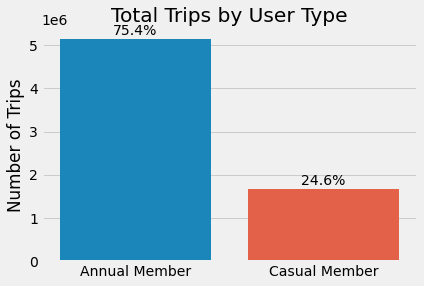

In [ ]:
#Create a bar graph to depict share of total rides by user type
ax = sns.countplot(data=df,x="User Type")
ax.set(title="Total Trips by User Type",ylabel="Number of Trips",xlabel="")

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

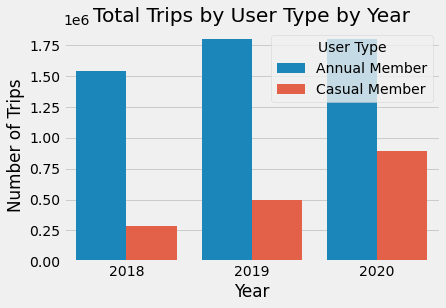

In [ ]:
#Create a clustered bar chart depicting proportions of user type per year
sns.countplot(data=df,x='Year',hue="User Type")\
   .set(title="Total Trips by User Type by Year",ylabel="Number of Trips")
plt.show()

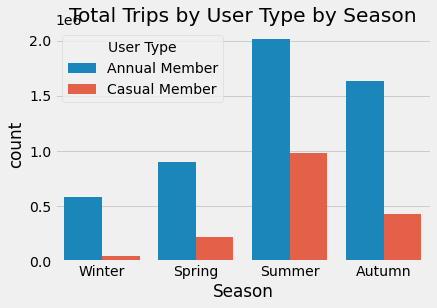

In [ ]:
#Create a clustered bar chart depicting proportions of user type per season
sns.countplot(data=df,x='Season',hue="User Type")\
   .set(title="Total Trips by User Type by Season")
plt.show()

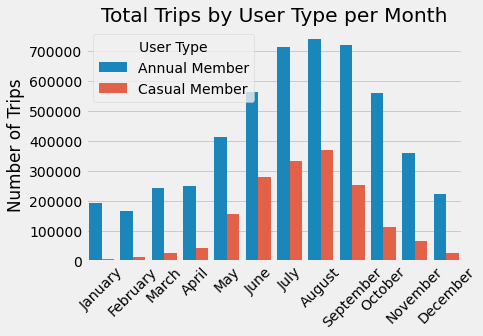

In [ ]:
#Create a bar graph depicting total rides by user type per month.
usertypemonth = sns.countplot(data=df,x='Month',hue="User Type")
usertypemonth.set_xticklabels(usertypemonth.get_xticklabels(), rotation=45)
usertypemonth.set(title="Total Trips by User Type per Month",ylabel = "Number of Trips",xlabel="")
plt.show()

In [ ]:
#Create a dataframe depicting total number of trips per user type by day.
user_growth = df.groupby(["Date","User Type"]).agg({"Trip ID":"count"}).reset_index()\
                .rename(columns={"Trip ID":"Number of Trips"})
user_growth.head()

,Date,User Type,Number of Trips
0,2018-01-01,Annual Member,233
1,2018-01-01,Casual Member,8
2,2018-01-02,Annual Member,931
3,2018-01-02,Casual Member,19
4,2018-01-03,Annual Member,1162


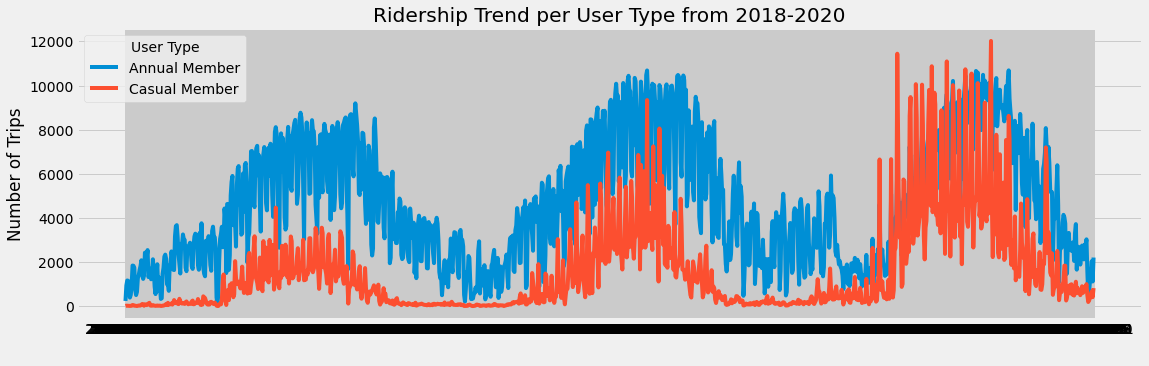

In [ ]:
#Plot a line graph depicting change in number of trips per user type from 2018-2020
plt.figure(figsize=[17,5])
sns.lineplot(data=user_growth, x="Date", y="Number of Trips", hue="User Type")\
   .set(title="Ridership Trend per User Type from 2018-2020",xlabel=" ")
ax.xaxis.set_major_locator(md.AutoDateLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))

#format x axis
fig.autofmt_xdate()
plt.show()

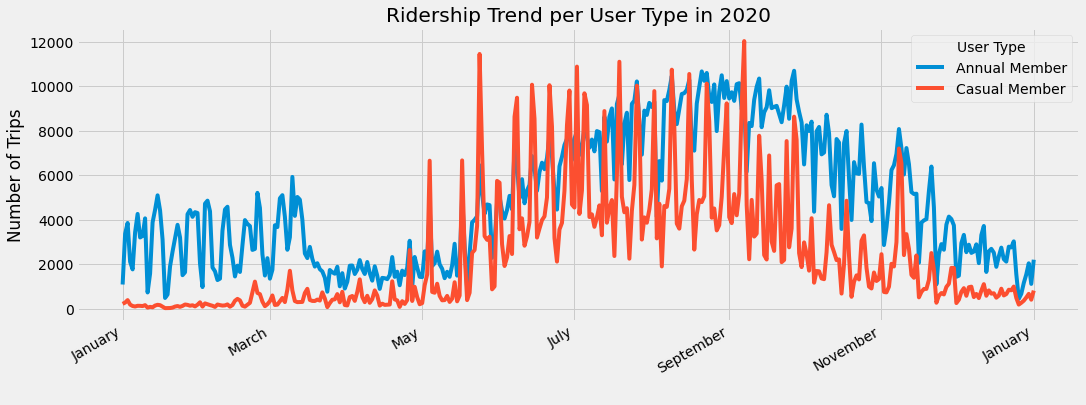

In [ ]:
#Create a dataframe depicting change in number of rides per user type in 2020
user_growth_2020 = df[df["Year"]=="2020"].groupby(["Date","User Type"])\
                   .agg({"Trip ID":"count"}).reset_index().rename(columns={"Trip ID":"Number of Trips"})

#Plot a line graph depicting change in number of rides per user type in 2020
fig,ax = plt.subplots(figsize=(16,6))
sns.lineplot(data=user_growth_2020, x="Date", y="Number of Trips", hue="User Type")\
                                    .set(title="Ridership Trend per User Type in 2020",xlabel=" ")
ax.xaxis.set_major_locator(md.AutoDateLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('%B'))
fig.autofmt_xdate()

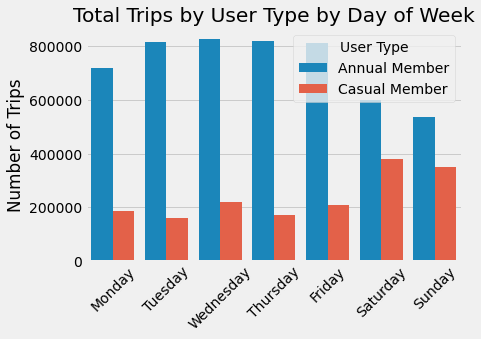

In [ ]:
#Create a bar graph depicting total rides by user type per day of week.
ax = sns.countplot(data=df,x='Day of Week',hue="User Type",\
                   order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(title="Total Trips by User Type by Day of Week",ylabel = "Number of Trips",xlabel="")
plt.show()

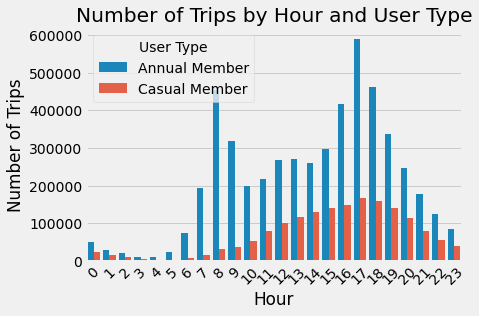

In [ ]:
#Create a bar graph depicting total rides by user type per hour of day.
usertype = sns.countplot(data=df,x='Hour',hue="User Type",order=[str(x) for x in range(24)])
usertype.set(title="Number of Trips by Hour and User Type",ylabel = "Number of Trips")
usertype.set_xticklabels(usertype.get_xticklabels(), rotation=45)
plt.show()

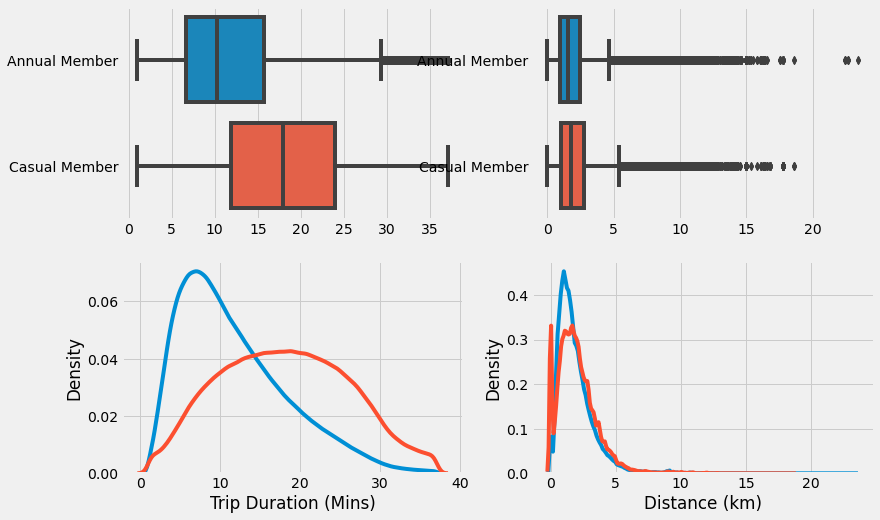

In [ ]:
#Plot box pots and density plots to depict distribution of Trip Distance and Trip Duration by user type.
fig, (ax1,ax2) = plt.subplots(2,2,figsize=(12,8))
for i, var in enumerate(['Trip Duration (Mins)','Distance (km)']):
    for j,user in enumerate(df['User Type'].unique()):
        sns.distplot(df[df['User Type'] == user][var],hist=False,ax=ax2[i]) 
        sns.boxplot(x=var, y="User Type",data=df, ax=ax1[i]).set(xlabel="",ylabel="")

In [ ]:
#Subset dataframe to include only Annual Members and group by Route ID.
pop_routes_annual = df[df["User Type"]=="Annual Member"]\
                    .groupby("Route ID").agg({"Start Station Name":"max",
                                              "End Station Name":"max",                                     
                                              "Trip ID":"count"}).reset_index()\
                    .rename(columns={"Trip ID":"Number of Trips"})

#Sort by Number of Trips
pop_routes_annual.sort_values("Number of Trips",ascending=False).head()

,Route ID,Start Station Name,End Station Name,Number of Trips
24260,7059-7033,Front St W / Blue Jays Way,Union Station,3927
71370,7203-7076,Bathurst St/Queens Quay(Billy Bishop Airport),York St / Queens Quay W,3342
30890,7076-7203,York St / Queens Quay W,Bathurst St/Queens Quay(Billy Bishop Airport),2887
21118,7051-7042,Wellesley St E / Yonge St (Green P),Sherbourne St / Wellesley St E,2399
6644,7016-7068,Bay St / Queens Quay W (Ferry Terminal),Dockside Dr / Queens Quay E (Sugar Beach),2025


In [ ]:
#Subset dataframe to include only Casual Members and groupby Route ID.
pop_routes_casual = df[df["User Type"]=="Casual Member"]\
                    .groupby("Route ID").agg({"Start Station Name":"max",
                                              "End Station Name":"max",                                     
                                              "Trip ID":"count"}).reset_index()\
                    .rename(columns={"Trip ID":"Number of Trips"})

#Sort by Number of Trips
pop_routes_casual.sort_values("Number of Trips",ascending=False).head()

,Route ID,Start Station Name,End Station Name,Number of Trips
51931,7171-7171,Ontario Place Blvd / Lakeshore Blvd W,Ontario Place Blvd / Lakeshore Blvd W,4035
81838,7288-7288,Humber Bay Shores Park West,Humber Bay Shores Park West,3766
53065,7175-7175,HTO Park (Queens Quay W),HTO Park (Queens Quay W),3751
94142,7354-7354,Tommy Thompson Park (Leslie Street Spit),Tommy Thompson Park (Leslie Street Spit),3444
69086,7242-7242,Lakeshore Blvd W / Ontario Dr,Lakeshore Blvd W / Ontario Dr,3272


## Effects of Weather Patterns

In [ ]:
#load toronto weather data from 2018-2020
weather = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/toronto_weather_2018_2020.csv")
weather.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2018-01-01,2018,1,1,NaN,-7.9,...,NaN,M,0.2,NaN,11.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2018-01-02,2018,1,2,NaN,-7.1,...,NaN,M,0.0,NaN,9.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2018-01-03,2018,1,3,NaN,-5.3,...,NaN,M,0.2,NaN,11.0,NaN,NaN,M,NaN,M
3,-79.4,43.67,TORONTO CITY,6158355,2018-01-04,2018,1,4,NaN,-7.7,...,NaN,M,0.2,NaN,11.0,NaN,NaN,M,NaN,M
4,-79.4,43.67,TORONTO CITY,6158355,2018-01-05,2018,1,5,NaN,-14.7,...,NaN,M,0.0,NaN,10.0,NaN,NaN,M,NaN,M


In [ ]:
#Merge the weather dataset with the bike share dataset
df = df.merge(weather[["Date/Time","Mean Temp (°C)","Total Precip (mm)","Snow on Grnd (cm)"]],\
            how="inner",left_on="Date",right_on="Date/Time")\
            .drop("Date/Time", 1)\
            .rename(columns={"Mean Temp (°C)":"Mean Temp (C)"})

df.head()

,Date,Time,Trip ID,Trip Duration (Mins),Start Station ID,Start Time,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,...,Year,Quarter,Route ID,Distance (km),Weekend,Holiday,Season,Mean Temp (C),Total Precip (mm),Snow on Grnd (cm)
0,2018-01-01,00:47:00,2383648,6.6,7018,2018-01-01 00:47:00,Bremner Blvd / Rees St,43.641529,-79.386741,7176,...,2018,1,7018-7176,1.07,Weekday,Holiday,Winter,-13.3,0.2,11.0
1,2018-01-01,02:45:00,2383667,7.2,7111,2018-01-01 02:45:00,King St W / Douro St,43.640885,-79.416379,7176,...,2018,1,7111-7176,1.37,Weekday,Holiday,Winter,-13.3,0.2,11.0
2,2018-01-01,05:46:00,2383690,26.0,7049,2018-01-01 05:46:00,Queen St W / Portland St,43.647600,-79.401500,7176,...,2018,1,7049-7176,0.95,Weekday,Holiday,Winter,-13.3,0.2,11.0
3,2018-01-01,20:51:00,2383999,12.8,7155,2018-01-01 20:51:00,Bathurst St / Lennox St,43.663808,-79.410491,7176,...,2018,1,7155-7176,2.87,Weekday,Holiday,Winter,-13.3,0.2,11.0
4,2018-01-01,12:16:00,2383780,4.3,7031,2018-01-01 12:16:00,Jarvis St / Isabella St,43.668991,-79.379385,7014,...,2018,1,7031-7014,0.82,Weekday,Holiday,Winter,-13.3,0.2,11.0


In [ ]:
#Aggregate total number of rides by day
df_daily = df.groupby('Date')\
             .agg({'Mean Temp (C)':'mean',
                   'Total Precip (mm)':'mean',
                   'Snow on Grnd (cm)':'mean',
                   'Trip ID':'count', 
                   'Trip Duration (Mins)':'mean',
                   'Distance (km)':'mean'})\
             .reset_index().rename(columns={"Trip ID":"Number of Trips"})

df_daily.head()

,Date,Mean Temp (C),Total Precip (mm),Snow on Grnd (cm),Number of Trips,Trip Duration (Mins),Distance (km)
0,2018-01-01,-13.3,0.2,11.0,241,9.247303,1.347510
1,2018-01-02,-9.8,0.0,9.0,950,10.703684,1.749400
2,2018-01-03,-8.3,0.2,11.0,1177,10.258539,1.710187
3,2018-01-04,-13.7,0.2,11.0,1163,9.832932,1.610318
4,2018-01-05,-17.7,0.0,10.0,781,9.731882,1.549680


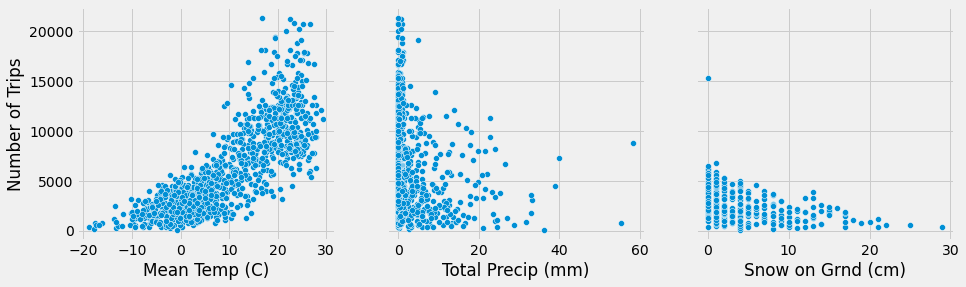

In [ ]:
#Create three scatter plots showing number of rides by temperature, precipitation and snow on ground
fig, axes = plt.subplots(1,3,figsize=(14,4),sharey=True)

for i, col in enumerate(["Mean Temp (C)","Total Precip (mm)","Snow on Grnd (cm)"]):
    sns.scatterplot(ax=axes[i],data=df_daily,x=col,y="Number of Trips")

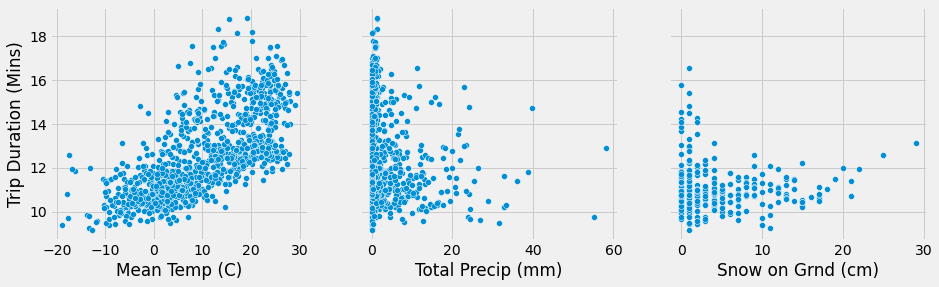

In [ ]:
#Create three scatter plots showing trip duration by temperature, precipitation and snow on ground
fig, axes = plt.subplots(1,3,figsize=(14,4),sharey=True)

for i, col in enumerate(["Mean Temp (C)","Total Precip (mm)","Snow on Grnd (cm)"]):
    sns.scatterplot(ax=axes[i],data=df_daily,x=col,y="Trip Duration (Mins)")

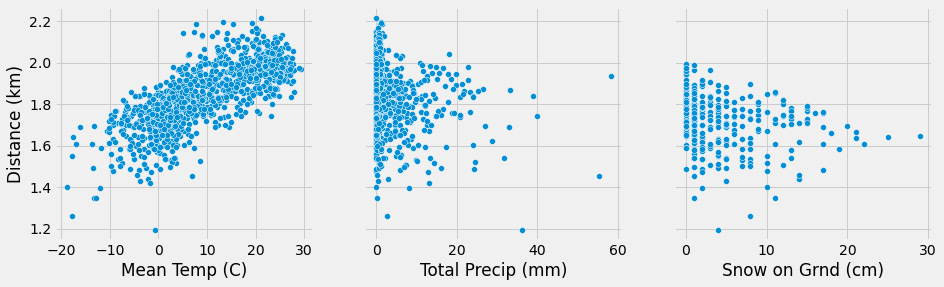

In [ ]:
#Create three scatter plots showing trip distance by temperature, precipitation and snow on ground
fig, axes = plt.subplots(1,3,figsize=(14,4),sharey=True)

for i, col in enumerate(["Mean Temp (C)","Total Precip (mm)","Snow on Grnd (cm)"]):
    sns.scatterplot(ax=axes[i],data=df_daily,x=col,y="Distance (km)")

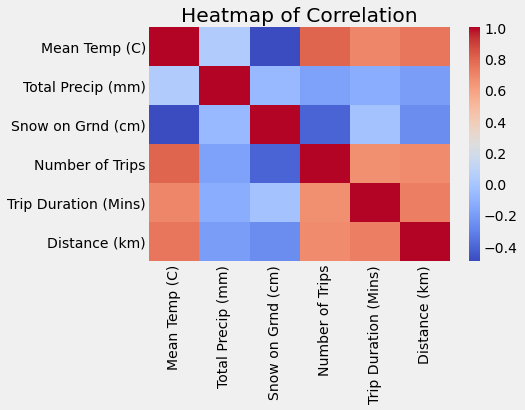

In [ ]:
#plot a heatmap tofurther highlight relationships
sns.heatmap(df_daily.corr(),cmap="coolwarm").set(title="Heatmap of Correlation")
plt.show()

## Geolocational Analysis

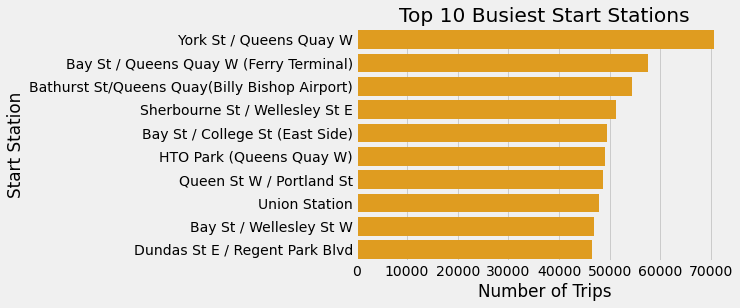

In [ ]:
#Isolate the latitude and longitude for every row in df 
all_stations = df[['Start Station Name','Start Station Latitude', 'Start Station Longitude']]

#Create a function to extract the top 10 busiest stations
def ten_busiest_stations(dataframe):
    return dataframe.value_counts().head(10).reset_index()\
            .rename(columns={"index":"Start Station","Start Station Name":"Number of Trips"})

#Create a dataframe of the ten most popular stations
busieststations_all = ten_busiest_stations(all_stations["Start Station Name"])

#Plot a bar chart depicting the ten most popular stations
sns.barplot(data=busieststations_all,x="Number of Trips",y="Start Station",color="orange")\
   .set(title="Top 10 Busiest Start Stations")
plt.show()

In [ ]:
#Create a function to retrieve the latitude and longitude coordinates for selected stations
def find_coordinates(stationlist):
    coordinateslist =[]
    for station in stationlist["Start Station"]:
        coordinates = df[df["Start Station Name"] == station][["Start Station Latitude","Start Station Longitude"]]\
                      .iloc[0]
        coordinateslist.append((coordinates[0],coordinates[1]))
    return coordinateslist

#Build a function that returns a count of all unique coordinates in the data
def count_coordinates(dataframe):
    dataframe['coordinates'] = (dataframe["Start Station Latitude"].apply(lambda x: str(x)+',')+\
                            dataframe["Start Station Longitude"].astype(str))
    dataframe=dataframe.groupby('coordinates')["Start Station Latitude"].count()\
                            .reset_index().rename(columns={"Start Station Latitude":"Count"})
    dataframe[['Latitude', 'Longitude']] = dataframe['coordinates'].str.split(",", 1, expand=True).astype(float)
    return dataframe

In [ ]:
#Input Google Maps API key
gmaps.configure(api_key="your_api_key")

#Create a map layout
figure_layout = {
    'width': '500px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px'
}

#Plot the coordinates on google maps
fig = gmaps.figure(layout=figure_layout)
fig.add_layer(gmaps.heatmap_layer(
    count_coordinates(all_stations)[["Latitude","Longitude"]],
    weights=count_coordinates(all_stations)["Count"],
    point_radius=10))
markers = gmaps.marker_layer(find_coordinates(busieststations_all))
fig.add_layer(markers)
fig

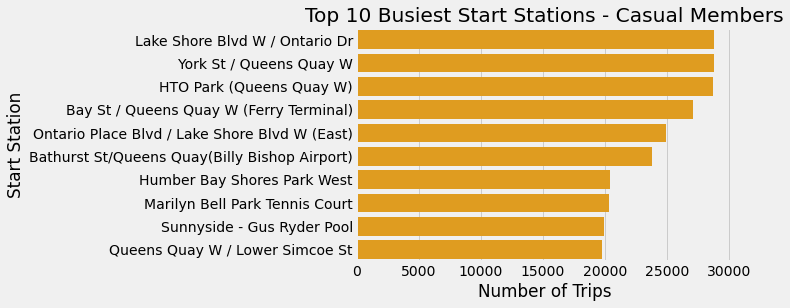

In [ ]:
#Create a dataframe showing rides by casual users
stations_casual=df[df["User Type"]=="Casual Member"][['Start Station Name',
                                                      'Start Station Latitude', 
                                                      'Start Station Longitude']]

#Create a dataframe of the ten most popular stations by casual users
busieststations_casual = ten_busiest_stations(stations_casual["Start Station Name"])

#Plot a bar chart depicting the ten most popular stations by casual users
sns.barplot(data=busieststations_casual,x="Number of Trips",y="Start Station",color="orange")\
   .set(title="Top 10 Busiest Start Stations - Casual Members")
plt.show()

In [ ]:
#Plot the coordinates for the ten most popular stations by casual users on google maps
fig = gmaps.figure(layout=figure_layout)
fig.add_layer(gmaps.heatmap_layer(
    count_coordinates(stations_casual)[["Latitude","Longitude"]],
    weights=count_coordinates(stations_casual)["Count"],
    point_radius=10))
markers = gmaps.marker_layer(find_coordinates(busieststations_casual))
fig.add_layer(markers)
fig

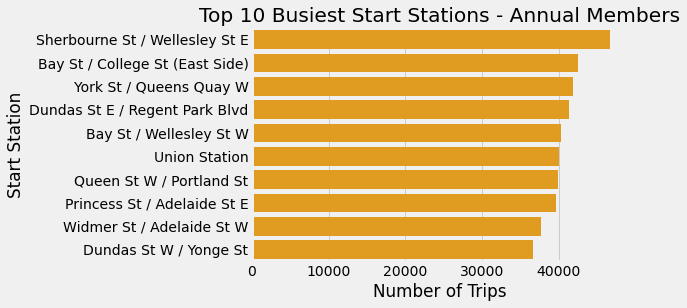

In [ ]:
#Create a dataframe showing rides by annual users
stations_annual = df[df["User Type"]=="Annual Member"][['Start Station Name',
                                                        'Start Station Latitude',
                                                        'Start Station Longitude']]

#Create a dataframe of the ten most popular stations by annual users
busieststations_annual = ten_busiest_stations(stations_annual["Start Station Name"])

#Plot a bar chart depicting the ten most popular stations by annual users
sns.barplot(data=busieststations_annual,x="Number of Trips",y="Start Station",color="orange")\
   .set(title="Top 10 Busiest Start Stations - Annual Members")
plt.show()

In [ ]:
#Plot the coordinates for ten most popular stations by annual users on google maps
fig = gmaps.figure(layout=figure_layout)
fig.add_layer(gmaps.heatmap_layer(
    count_coordinates(stations_annual)[["Latitude","Longitude"]],
    weights=count_coordinates(stations_annual)["Count"],
    point_radius=10))
markers = gmaps.marker_layer(find_coordinates(busieststations_annual))
fig.add_layer(markers)
fig

In [ ]:
#Subset dataframe to include only data for 2018 and 2019.
stations_prepandemic = df[(df["Year"]=="2018") | (df["Year"]=="2019")][['Start Station Name',
                                                                        'Start Station Latitude', 
                                                                        'Start Station Longitude']]
#Subset dataframe to include only data for only 2020.
stations_pandemic = df[df["Year"]=="2020"][['Start Station Name',
                                            'Start Station Latitude', 
                                            'Start Station Longitude']]

#Create a dataframe of the ten most popular stations in 2018 and 2019.
busieststations_prepandemic = ten_busiest_stations(stations_prepandemic["Start Station Name"])

#Create a dataframe of the most popular stations in 2020.
busieststations_pandemic = ten_busiest_stations(stations_pandemic["Start Station Name"])

In [ ]:
#Plot the coordinates for the most popular stations before and during the pandemic
prepandemic_layer = gmaps.symbol_layer(
    find_coordinates(busieststations_prepandemic), fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 150, 0, 0.4)', scale=4
)

pandemic_layer = gmaps.symbol_layer(
    find_coordinates(busieststations_pandemic), fill_color='rgba(200, 0, 0, 0.4)',
    stroke_color='rgba(200, 0, 0, 0.4)', scale=4
)

fig = gmaps.figure(layout=figure_layout)
fig.add_layer(prepandemic_layer)
fig.add_layer(pandemic_layer)
fig

In [ ]:
#Subset dataframe to include only data for 2018 and 2019 and group by Route ID.
pop_routes_prepandemic = df[(df["Year"]=="2018") | (df["Year"]=="2019")]\
                        .groupby("Route ID").agg({"Start Station Name":"max",
                                              "End Station Name":"max",
                                              "Start Station Latitude":"mean",
                                              "Start Station Longitude":"mean",
                                              "End Station Latitude":"mean",
                                              "End Station Longitude":"mean",
                                              "Trip ID":"count"}).reset_index()\
                        .rename(columns={"Trip ID":"Number of Trips"})

#Create a dataframe depicting the 5 most popular routes before the pandemic
pop_routes_prepandemic = pop_routes_prepandemic.sort_values("Number of Trips",ascending=False).head()
pop_routes_prepandemic[["Route ID","Start Station Name","End Station Name","Number of Trips"]]

,Route ID,Start Station Name,End Station Name,Number of Trips
62537,7203-7076,Bathurst St/Queens Quay(Billy Bishop Airport),York St / Queens Quay W,3936
21471,7059-7033,Front St W / Blue Jays Way,Union Station,3474
27414,7076-7203,York St / Queens Quay W,Bathurst St/Queens Quay(Billy Bishop Airport),3266
54333,7171-7171,Ontario Place Blvd / Lakeshore Blvd W,Ontario Place Blvd / Lakeshore Blvd W,3016
5863,7016-7068,Bay St / Queens Quay W (Ferry Terminal),Dockside Dr / Queens Quay E (Sugar Beach),2442


In [ ]:
#Plot the most popular route before the pandemic on google maps
fig = gmaps.figure(layout=figure_layout)
bathurst2york = gmaps.directions_layer((43.635492,-79.398253), (43.640132,-79.380464),travel_mode='BICYCLING')
fig.add_layer(bathurst2york)
fig

In [ ]:
#Subset dataframe to include only data for 2020 and groupby Route ID.
pop_routes_pandemic = df[df["Year"]=="2020"]\
                        .groupby("Route ID").agg({"Start Station Name":"max",
                                              "End Station Name":"max",
                                              "Start Station Latitude":"mean",
                                              "Start Station Longitude":"mean",
                                              "End Station Latitude":"mean",
                                              "End Station Longitude":"mean",
                                              "Trip ID":"count"}).reset_index()\
                        .rename(columns={"Trip ID":"Number of Trips"})

#Create a dataframe depicting the 5 most popular routes during the pandemic
pop_routes_pandemic = pop_routes_pandemic.sort_values("Number of Trips",ascending=False).head()
pop_routes_pandemic[["Route ID","Start Station Name","End Station Name","Number of Trips"]]

,Route ID,Start Station Name,End Station Name,Number of Trips
105238,7354-7354,Tommy Thompson Park (Leslie Street Spit),Tommy Thompson Park (Leslie Street Spit),3188
102976,7344-7354,Cherry Beach,Tommy Thompson Park (Leslie Street Spit),3006
105233,7354-7344,Tommy Thompson Park (Leslie Street Spit),Cherry Beach,2613
56880,7171-7171,Ontario Place Blvd / Lake Shore Blvd W (East),Ontario Place Blvd / Lake Shore Blvd W (East),2593
91062,7288-7288,Humber Bay Shores Park West,Humber Bay Shores Park West,2515


In [ ]:
#Plot the most popular one way trip during the pandemic on google maps
fig = gmaps.figure(layout=figure_layout)
cherrybeach2tommypark = gmaps.directions_layer((43.637764,-79.345359),(43.645836,-79.320889) ,travel_mode='BICYCLING')
fig.add_layer(cherrybeach2tommypark)
fig